In [333]:
pip install resampy

In [334]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [335]:
print(os.getcwd())

/content


In [336]:
data_path = '/content/drive/MyDrive/DST86/machine-sound-daata'
print(os.listdir(data_path))

['test', 'val', 'train', 'trainxx', '.ipynb_checkpoints']


In [337]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

test
val
train
trainxx
.ipynb_checkpoints


In [338]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [339]:
from pickle import dump
from pickle import load

In [340]:
train_data = data_path+"/train"
os.listdir(train_data)

['n_00000000_5000.wav',
 'n_00000003_0.wav',
 'n_00000004_0.wav',
 'n_00000017_0.wav',
 'n_00000002_5000.wav',
 'n_00000010_5000.wav',
 'n_00000001_0.wav',
 'n_00000007_0.wav',
 'n_00000005_0.wav',
 'n_00000002_0.wav',
 'n_00000007_5000.wav',
 'n_00000011_5000.wav',
 'n_00000008_5000.wav',
 'n_00000005_5000.wav',
 'n_00000001_5000.wav',
 'n_00000017_5000.wav',
 'n_00000008_0.wav',
 'n_00000019_5000.wav',
 'n_00000016_5000.wav',
 'n_00000021_0.wav',
 'n_00000014_0.wav',
 'n_00000012_0.wav',
 'n_00000016_0.wav',
 'n_00000021_5000.wav',
 'n_00000012_5000.wav',
 'n_00000015_0.wav',
 'n_00000013_5000.wav',
 'n_00000022_0.wav',
 'n_00000020_0.wav',
 'n_00000018_5000.wav',
 'n_00000024_0.wav',
 'n_00000023_0.wav',
 'n_00000025_5000.wav',
 'n_00000030_0.wav',
 'n_00000027_0.wav',
 'n_00000026_0.wav',
 'n_00000024_5000.wav',
 'n_00000037_5000.wav',
 'n_00000029_0.wav',
 'n_00000031_5000.wav',
 'n_00000031_0.wav',
 'n_00000029_5000.wav',
 'n_00000036_0.wav',
 'n_00000034_5000.wav',
 'n_00000036_

In [341]:
val_data = data_path+"/val"
os.listdir(val_data)

['n_00000010_0.wav',
 'n_00000009_5000.wav',
 'n_00000028_5000.wav',
 'n_00000030_5000.wav',
 'n_00000025_0.wav',
 'n_00000026_5000.wav',
 'n_00000027_5000.wav',
 'n_00000037_0.wav',
 'n_00000032_5000.wav',
 'n_00000043_0.wav',
 'n_00000046_0.wav',
 'n_00000050_5000.wav',
 'n_00000052_0.wav',
 'n_00000061_5000.wav',
 'n_00000060_0.wav',
 'n_00000072_0.wav',
 'n_00000076_5000.wav',
 'n_00000078_5000.wav',
 'n_00000085_5000.wav',
 'n_00000075_5000.wav',
 'n_00000081_0.wav',
 'n_00000090_0.wav',
 'n_00000099_5000.wav',
 'n_00000092_5000.wav',
 'n_00000087_0.wav',
 'n_00000098_0.wav',
 'n_00000105_5000.wav',
 'n_00000110_5000.wav',
 'n_00000109_0.wav',
 'n_00000108_5000.wav',
 'n_00000115_0.wav',
 'n_00000117_5000.wav',
 'n_00000128_0.wav',
 'n_00000130_5000.wav',
 'n_00000128_5000.wav',
 'n_00000141_0.wav',
 'n_00000140_0.wav',
 'n_00000136_5000.wav',
 'n_00000134_0.wav',
 'n_00000137_0.wav',
 'n_00000149_5000.wav',
 'n_00000146_0.wav',
 'n_00000145_0.wav',
 'n_00000148_0.wav',
 'n_000001

In [342]:
test_data = data_path+"/test"
os.listdir(test_data)

['n_00000003_5000.wav',
 'n_00000004_5000.wav',
 'n_00000000_0.wav',
 'n_00000006_5000.wav',
 'n_00000011_0.wav',
 'n_00000006_0.wav',
 'n_00000009_0.wav',
 'n_00000015_5000.wav',
 'n_00000014_5000.wav',
 'n_00000019_0.wav',
 'n_00000013_0.wav',
 'n_00000022_5000.wav',
 'n_00000020_5000.wav',
 'n_00000023_5000.wav',
 'n_00000018_0.wav',
 'n_00000028_0.wav',
 'n_00000034_0.wav',
 'n_00000043_5000.wav',
 'n_00000039_5000.wav',
 'n_00000049_5000.wav',
 'n_00000044_0.wav',
 'n_00000053_0.wav',
 'n_00000055_0.wav',
 'n_00000052_5000.wav',
 'n_00000055_5000.wav',
 'n_00000067_0.wav',
 'n_00000065_5000.wav',
 'n_00000063_5000.wav',
 'n_00000064_5000.wav',
 'n_00000062_0.wav',
 'n_00000067_5000.wav',
 'n_00000066_5000.wav',
 'n_00000066_0.wav',
 'n_00000071_5000.wav',
 'n_00000077_0.wav',
 'n_00000085_0.wav',
 'n_00000079_0.wav',
 'n_00000079_5000.wav',
 'n_00000086_5000.wav',
 'n_00000080_0.wav',
 'n_00000083_5000.wav',
 'n_00000082_0.wav',
 'n_00000088_0.wav',
 'n_00000095_0.wav',
 'n_000000

In [343]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [344]:
normal_train

'/content/drive/MyDrive/DST86/machine-sound-daata/train/n_*.wav'

In [345]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [346]:
import librosa
import librosa.display

In [347]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [348]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (279, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [349]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [350]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [351]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [352]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [353]:
len(normal_train_signals), len(abnormal_train_signals)

(279, 175)

In [354]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [355]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

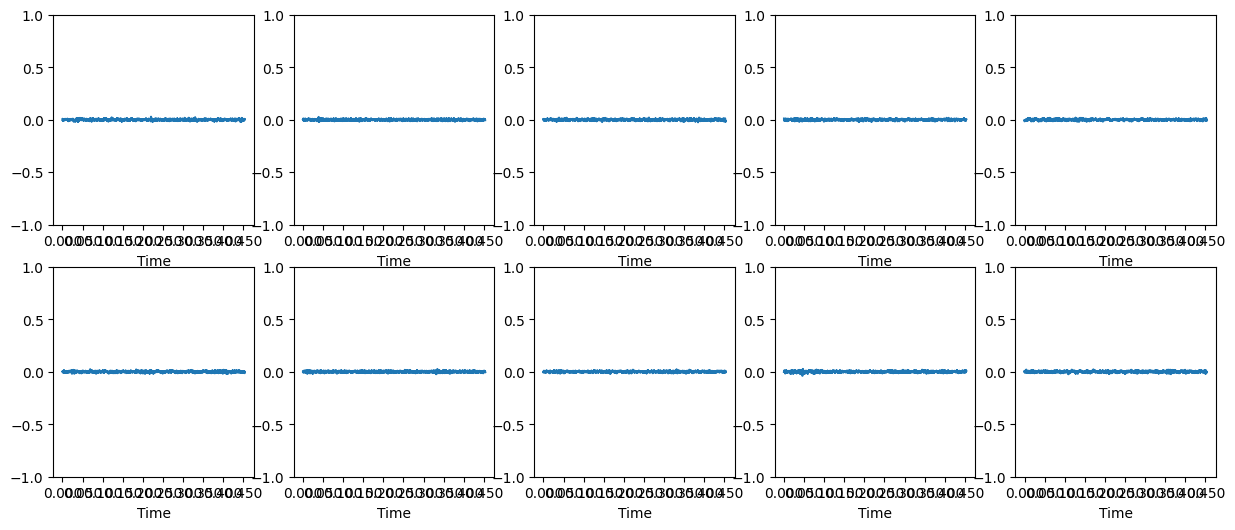

In [356]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

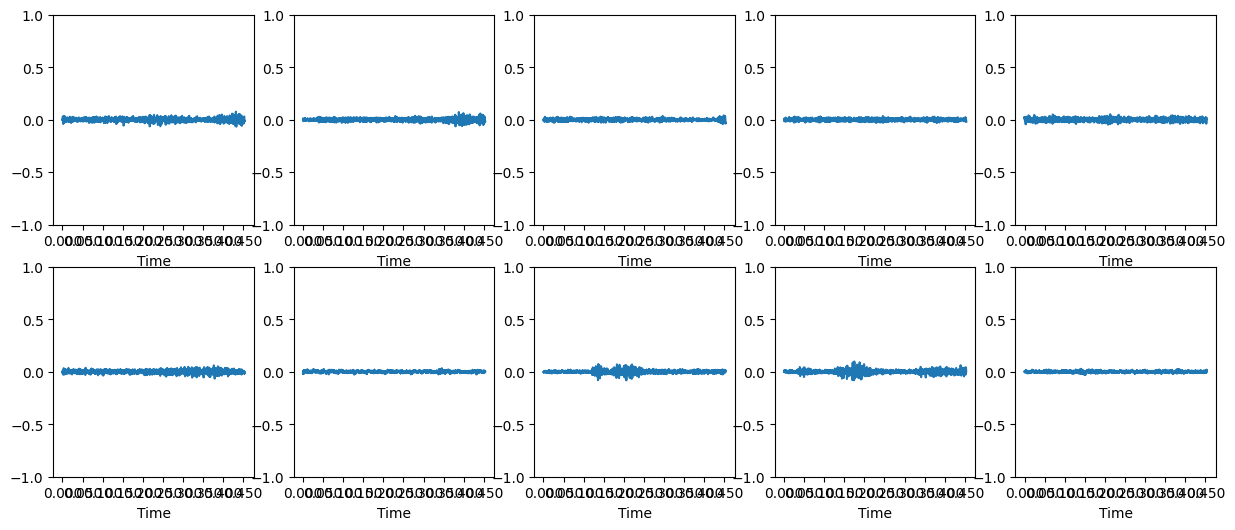

In [357]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [358]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [359]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [360]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [361]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(279, 2)
(175, 2)
(119, 2)
(47, 2)


In [362]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[4.29687500e-02 1.90580011e+03]
[4.2968750e-02 1.6388031e+03]
[5.66406250e-02 2.03547435e+03]
[2.97851562e-02 1.29509203e+03]


Text(0, 0.5, 'Count')

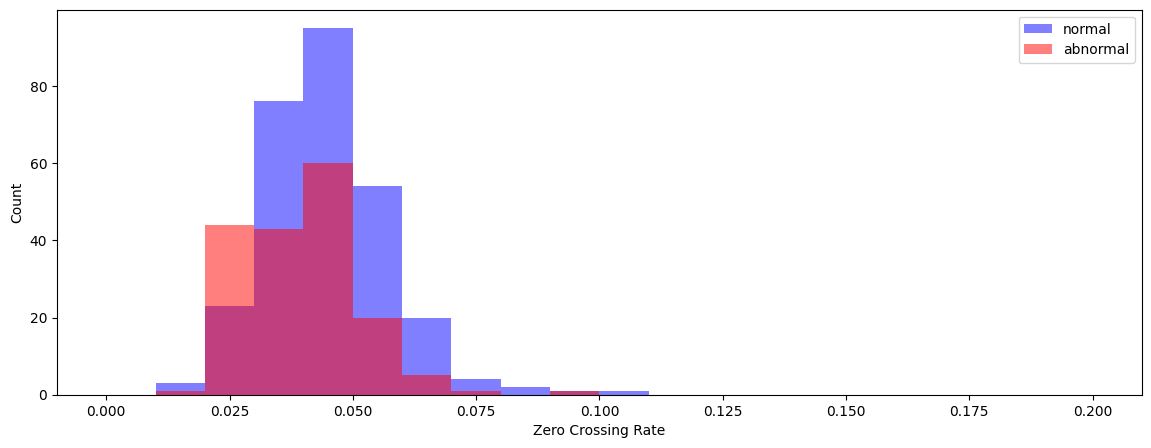

In [363]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

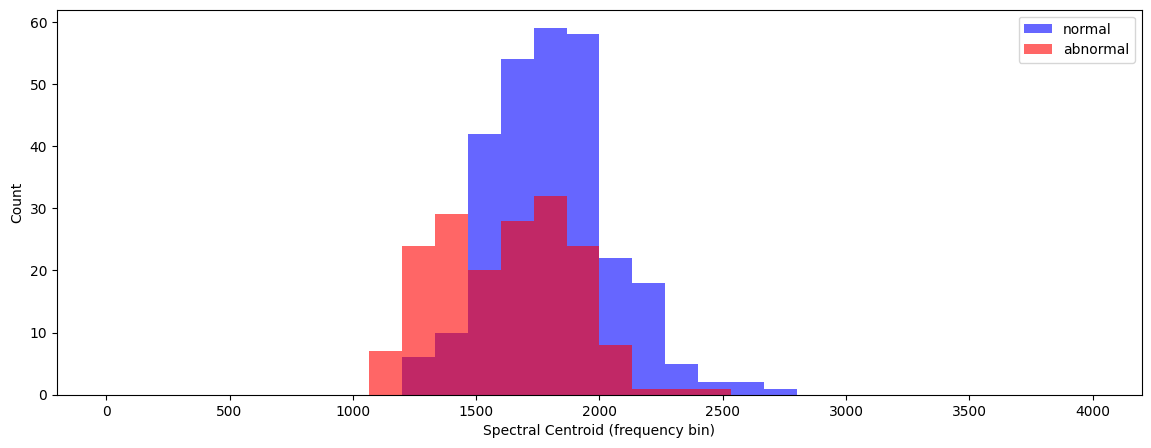

In [364]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [365]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(454, 2)


In [366]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [367]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [368]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

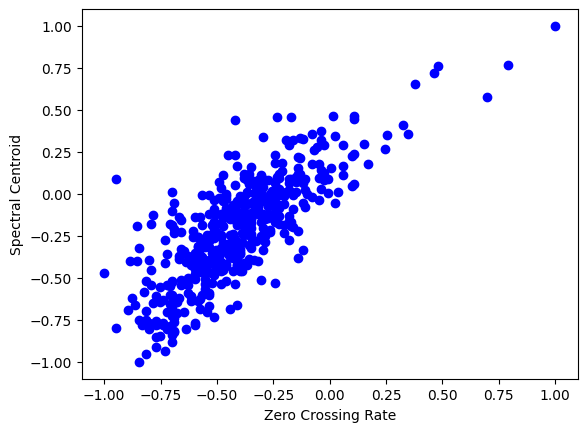

In [369]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [370]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [371]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [372]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [373]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [374]:
x_train.shape, y_train.shape

((454, 2), (664, 2))

In [375]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [376]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [377]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [378]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [379]:
print(x_train.shape)
print(y_train.shape)

(454, 2)
(664, 2)


In [380]:
y_train = y_train[:len(x_train)]

In [381]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7682 - loss: 0.6546 - val_accuracy: 0.7169 - val_loss: 0.6422
Epoch 2/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.5563 - val_accuracy: 0.7169 - val_loss: 0.6139
Epoch 3/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9967 - loss: 0.4590 - val_accuracy: 0.7169 - val_loss: 0.6003
Epoch 4/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.3625 - val_accuracy: 0.7169 - val_loss: 0.6047
Epoch 5/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.2909 - val_accuracy: 0.7169 - val_loss: 0.6310
Epoch 6/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.2252 - val_accuracy: 0.7169 - val_loss: 0.6787
Epoch 7/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9992 - loss: 0.1619 - val_accuracy: 0.7169 - val_loss: 0.7421
Epoch 8/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.1239 - val_accu

In [382]:
import plotly
import plotly.graph_objs as go

In [383]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [384]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [385]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [386]:
file_name = '/content/drive/MyDrive/DST86/machine-sound-daata/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


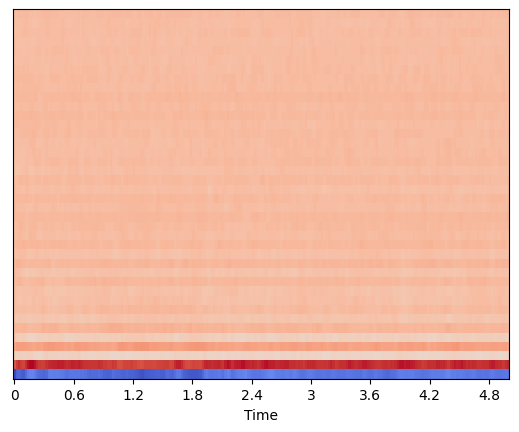

In [387]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [388]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [389]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [390]:
normal_train_features[0].shape

(40, 216)

In [391]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(454, 40, 216)


In [392]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(454, 40, 216, 1)


In [393]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [394]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [395]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [396]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [397]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((454, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [398]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [399]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [400]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [401]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [402]:
y_train = y_train[:len(x_train)]

In [403]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.6583 - loss: 5.5375
Epoch 1: val_loss improved from inf to 15.60170, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 835ms/step - accuracy: 0.6806 - loss: 5.1760 - val_accuracy: 0.7169 - val_loss: 15.6017
Epoch 2/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2: val_loss did not improve from 15.60170
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7169 - val_loss: 20.1320
Epoch 3/50
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3: val_loss did not improve from 15.60170
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7169 - val_loss: 22.2713
Epoch 4/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: val_loss did not improve from 15.60170
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0000e+0

In [404]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [405]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [406]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [407]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.0000, acc: 1.0000
Validation- loss: 15.6017, acc: 0.7169


In [408]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


In [409]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 47   0]]


In [410]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.7169    1.0000    0.8351       119
    abnormal     0.0000    0.0000    0.0000        47

    accuracy                         0.7169       166
   macro avg     0.3584    0.5000    0.4175       166
weighted avg     0.5139    0.7169    0.5986       166



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



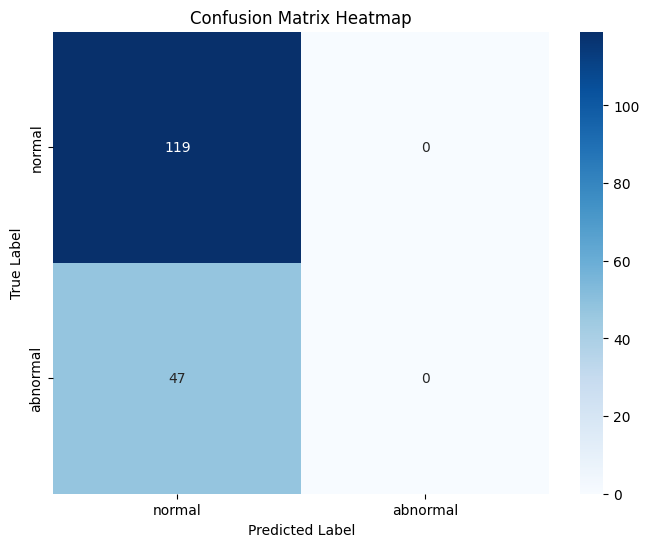

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Labweek 8**


In [423]:
import os

folder_path = '/content/drive/MyDrive/DST/test'
files = os.listdir(folder_path)

print(f"มี {len(files)} ไฟล์ใน folder {folder_path}:")
for f in files:
    print(f)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DST/test'

In [425]:
file_name = '/content/drive/MyDrive/DST86/machine-sound-daata/test/a_00000001_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


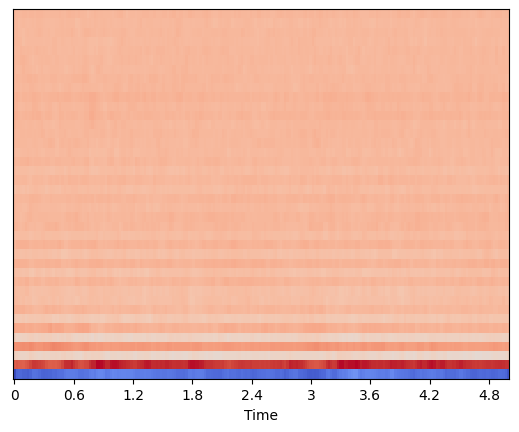

In [426]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [427]:

max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [428]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)


In [429]:
normal_train_features[0].shape

(40, 216)

In [430]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(454, 40, 216)


In [431]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(454, 40, 216, 1)


In [432]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [433]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [434]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [435]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [436]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((454, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [437]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [438]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [439]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [440]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [448]:
min_train = min(len(x_train), len(y_train))
x_train = x_train[:min_train]
y_train = y_train[:min_train]

min_val = min(len(x_val), len(y_val))
x_val = x_val[:min_val]
y_val = y_val[:min_val]

In [449]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.9573 - loss: 0.1590
Epoch 1: val_loss improved from inf to 15.98830, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 808ms/step - accuracy: 0.9601 - loss: 0.1487 - val_accuracy: 0.7169 - val_loss: 15.9883
Epoch 2/50
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
Epoch 2: val_loss did not improve from 15.98830
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7169 - val_loss: 20.3248
Epoch 3/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3: val_loss did not improve from 15.98830
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7169 - val_loss: 22.4723
Epoch 4/50
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: val_loss did not improve from 15.98830
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0000e+

In [450]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [451]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [452]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [453]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")

Training  - loss: 0.0000, acc: 1.0000
Validation- loss: 15.9883, acc: 0.7169


In [454]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [455]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 47   0]]


In [457]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.7169    1.0000    0.8351       119
    abnormal     0.0000    0.0000    0.0000        47

    accuracy                         0.7169       166
   macro avg     0.3584    0.5000    0.4175       166
weighted avg     0.5139    0.7169    0.5986       166



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



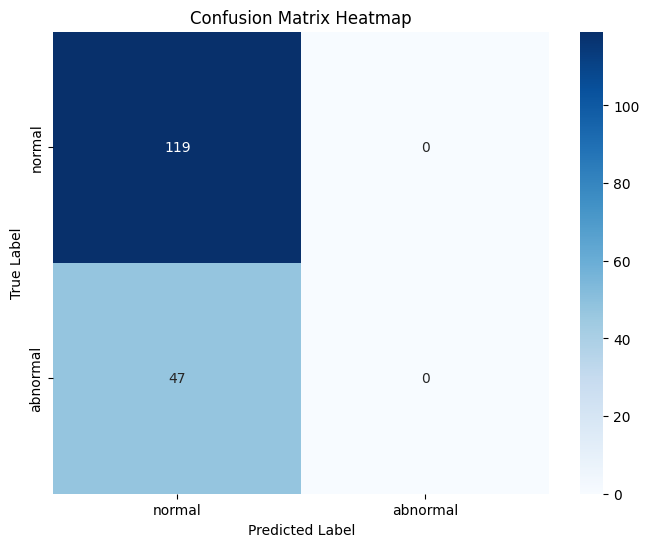

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()